### 支持向量机

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# 从feature_vectors.csv中导入数据
# data = pd.read_csv('features/feature.csv')
data = pd.read_csv('p4_test_vectors.csv')
# data = pd.read_csv('feature_vectors.csv')

# 划分训练集和测试集
X = data.drop(columns=['label'])  # 特征向量
y = data['label']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 使用支持向量机（SVM）模型
# model = SVC(kernel='linear')
model = SVC(kernel='linear', C=0.001)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上评估模型性能
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')  # 使用加权平均
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"精确度: {precision:.2f}")
print(f"召回率: {recall:.2f}")
print(f"F1 分数: {f1:.2f}")

精确度: 1.00
召回率: 1.00
F1 分数: 1.00


In [73]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split

# 加载数据
data = pd.read_csv('p4_test_vectors.csv')
X = data.drop(columns=['label'])  # 特征向量
y = data['label']  # 标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 创建SVM模型，使用最佳的C值
model = SVC(kernel='linear', C=0.01)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上评估模型性能
y_pred = model.predict(X_test)

# 计算评估指标
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')  # 使用加权平均
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"精确度: {precision:.2f}")
print(f"召回率: {recall:.2f}")
print(f"F1 分数: {f1:.2f}")

精确度: 0.96
召回率: 0.95
F1 分数: 0.95


In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# 用于提取音频特征的函数
def extract_features(file_name):
    # 加载音频文件
    y, sr = librosa.load(file_name, sr=None)
    
    # 提取MFCC特征
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_mean = np.mean(mfcc, axis=1)
    
    # 额外特征
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y)) # 零交叉率
    spectral_centroids = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)) # 频谱质心
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr)) # 频谱对比度
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)) # 添加频谱滚降点
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y)) # 添加频谱平坦度
    
    # 结合所有特征
    combined_features = np.hstack((mfcc_mean, zero_crossing_rate, spectral_centroids, spectral_contrast, spectral_rolloff, spectral_flatness))
    # combined_features = np.hstack((mfcc_mean, zero_crossing_rate, spectral_centroids, spectral_contrast))
    
    return combined_features

# 用于存储特征和标签的列表
features = []
labels = []

# 对每个文件夹进行迭代
for label in range(1, 5):  # 标签1到4
    folder_path = f'data/{label}'
    audio_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.wav')]
    
    for file in audio_files:
        # 提取特征
        extracted_features = extract_features(file)
        # 添加特征和标签
        features.append(extracted_features)
        labels.append(label)

# 转换为适合模型训练的格式
features = np.array(features)
labels = np.array(labels)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 初始化和训练模型
# model = SVC(kernel='linear')
# 使用找到的最佳参数初始化和训练模型
model = SVC(C=11.963459175608655, kernel='rbf', gamma=0.054344375598616296)
model.fit(X_train, y_train)

# 在测试集上评估模型
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

# 在测试集上评估模型
predictions = model.predict(X_test)
# 输出准确度
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
# 输出精确度
precision = precision_score(y_test, predictions, average='weighted')
print("Precision:", precision)
# 输出召回率
recall = recall_score(y_test, predictions, average='weighted')
print("Recall:", recall)
# 输出F1得分
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, randint

# 假设你已经有了X_train和y_train

# 设置SVC模型
model = make_pipeline(StandardScaler(), SVC())

# 定义要搜索的参数分布
param_distributions = {
    'svc__C': expon(scale=10),  # 对于连续参数，可以使用分布
    'svc__kernel': ['linear', 'rbf'],  # 对于分类参数，仍然是列表
    'svc__gamma': expon(scale=.1)  # 使用分布来随机采样
}

# 创建RandomizedSearchCV对象
random_search = RandomizedSearchCV(model, param_distributions, n_iter=100, cv=5, scoring='accuracy')

# 进行搜索
random_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 定义计算学习曲线的函数
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 定义模型
# model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
model = make_pipeline(StandardScaler(), SVC(C=11.963459175608655, kernel='rbf', gamma=0.054344375598616296))

# 绘制学习曲线
plot_learning_curve(model, "Learning Curve (SVC, linear kernel)", X_train, y_train, cv=5, n_jobs=-1)

plt.show()

In [ ]:
# 预测成功次数和总次数的初始化
success_counts = {1: 0, 2: 0, 3: 0, 4: 0}
total_counts = {1: 0, 2: 0, 3: 0, 4: 0}

# 假设目标文件夹路径为 'data/to_predict'
target_folder_path = '1data/111/chence'
# target_folder_path = '1data/111/wusiyuan'
# target_folder_path = '1data/111/xuzhaoqi'

# 读取目标文件夹中所有WAV音频文件的路径
target_audio_files = [os.path.join(target_folder_path, file) for file in os.listdir(target_folder_path) if file.endswith('.wav')]

# 根据文件名首字母确定正确的标签
def get_correct_label(filename):
    if filename.startswith('c'):
        return 1
    elif filename.startswith('l'):
        return 2
    elif filename.startswith('w'):
        return 3
    elif filename.startswith('x'):
        return 4
    else:
        return None  # 如果不符合任何条件，返回None

# 遍历每个文件，进行预测并更新成功次数和总次数
for file in target_audio_files:
    correct_label = get_correct_label(os.path.basename(file))
    if correct_label is None:  # 如果无法确定正确的标签，跳过此次循环
        continue

    # 提取特征并进行预测（保持之前的代码不变）
    extracted_features = extract_features(file).reshape(1, -1)
    extracted_features = scaler.transform(extracted_features)
    prediction = model.predict(extracted_features)[0]

    # 更新总次数
    total_counts[correct_label] += 1

    # 如果预测正确，更新成功次数
    if prediction == correct_label:
        success_counts[correct_label] += 1

# 计算并打印每个分类的预测成功率及平均成功率
success_rates = []
for label in range(1, 5):
    if total_counts[label] > 0:
        success_rate = success_counts[label] / total_counts[label] * 100
        success_rates.append(success_rate)
        print(f"Label {label} Prediction Success Rate: {success_rate:.2f}%")
    else:
        print(f"Label {label}: No files to predict.")

# 计算四个类别的平均成功率
if success_rates:
    average_success_rate = sum(success_rates) / len(success_rates)
    print(f"\nAverage Success Rate across all classes: {average_success_rate:.2f}%")
else:
    print("No predictions were made for any class.")

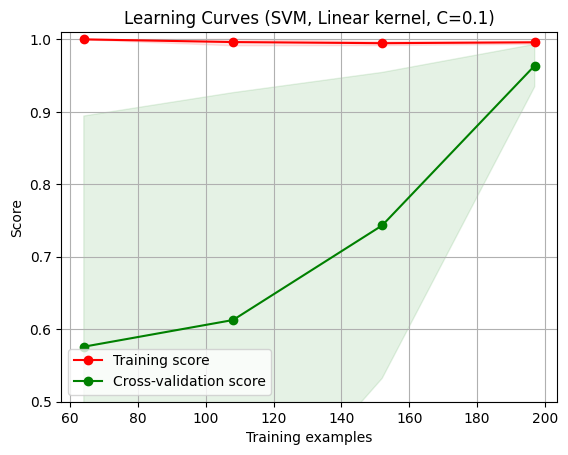

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 定义绘制学习曲线的函数
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    生成一个简单的学习曲线图。
    参数:
    - estimator : 用于学习数据的对象，必须是拟合器。
    - title : 图表的标题。
    - X : array-like, shape (n_samples, n_features) 训练向量。
    - y : array-like, shape (n_samples) or (n_samples, n_features) 目标相对于X进行分类或回归。
    - ylim : tuple, shape (ymin, ymax), 可选 定义最小和最大y值。
    - cv : int, cross-validation generator or an iterable, 可选 确定交叉验证的分割策略。
    - n_jobs : int or None, 可选 并行作业的数量。
    - train_sizes : array-like, shape (n_ticks,), 可选 训练样本的比例（相对数量）。
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 绘制学习曲线
title = "Learning Curves (SVM, Linear kernel, C=0.1)"
cv = None # 这里可以使用交叉验证策略，例如KFold
plot_learning_curve(SVC(kernel='linear'), title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

In [35]:
import joblib
# 保存模型到文件
model_filename = 'svm_onlypower.pkl'
joblib.dump(model, model_filename)
# 保存特征向量化器，如果有的话
# scaler_filename = 'lgb_scaler.pkl'
# joblib.dump(scaler, scaler_filename)

print(f"模型已保存到文件：{model_filename}")
# print(f"向量化器已保存到文件：{scaler_filename}")

模型已保存到文件：svm_onlypower.pkl


### 贝叶斯

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# 从feature_vectors.csv中导入数据
# data = pd.read_csv('features/feature_NB.csv')
data = pd.read_csv('p4_test_vectors.csv')

# 划分训练集和测试集
X = data.drop(columns=['label'])  # 特征向量
y = data['label']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = GaussianNB()
# model = MultinomialNB()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上评估模型性能
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')  # 使用加权平均
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"精确度: {precision:.2f}")
print(f"召回率: {recall:.2f}")
print(f"F1 分数: {f1:.2f}")

精确度: 0.45
召回率: 0.40
F1 分数: 0.28


C:\ANACONDA\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 决策树

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# 从feature_vectors.csv中导入数据
# data = pd.read_csv('features/feature.csv')
data = pd.read_csv('p4_test_vectors.csv')

# 划分训练集和测试集
X = data.drop(columns=['label'])  # 特征向量
y = data['label']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = DecisionTreeClassifier()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上评估模型性能
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')  # 使用加权平均
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"精确度: {precision:.2f}")
print(f"召回率: {recall:.2f}")
print(f"F1 分数: {f1:.2f}")

精确度: 0.56
召回率: 0.53
F1 分数: 0.53


### 随机森林

In [18]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# 从feature_vectors.csv中导入数据
# data = pd.read_csv('features/feature_NB.csv')
data = pd.read_csv('p4_test_vectors.csv')

# 划分训练集和测试集
X = data.drop(columns=['label'])  # 特征向量
y = data['label']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 建立随机森林模型
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # 可根据需要调整参数
# 训练模型
rfc.fit(X_train, y_train)
# 预测测试集标签
y_pred = rfc.predict(X_test)

# 计算精确度、召回率和 F1 分数
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"精确度: {precision:.2f}")
print(f"召回率: {recall:.2f}")
print(f"F1 分数: {f1:.2f}")

精确度: 0.59
召回率: 0.57
F1 分数: 0.58


### 梯度提升分类器

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# 从feature_vectors.csv中导入数据
# data = pd.read_csv('features/feature_NB.csv')
data = pd.read_csv('p4_test_vectors.csv')
# data = pd.read_csv('feature_vectors.csv')

# 划分训练集和测试集
X = data.drop(columns=['label'])  # 特征向量
y = data['label']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 创建梯度提升分类器
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
# 在训练集上拟合模型
gbc.fit(X_train, y_train)
# 预测测试集标签
y_pred = gbc.predict(X_test)

# 计算精确度、召回率和 F1 分数
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"精确度: {precision:.2f}")
print(f"召回率: {recall:.2f}")
print(f"F1 分数: {f1:.2f}")

精确度: 0.61
召回率: 0.60
F1 分数: 0.60


### 梯度提升算法 适用于高维特征

#### XGBoost

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# 从feature_vectors.csv中导入数据
# data = pd.read_csv('features/feature.csv')
data = pd.read_csv('p4_test_vectors.csv')
# data = pd.read_csv('feature_vectors.csv')

# 划分训练集和测试集
X = data.drop(columns=['label'])  # 特征向量
y = data['label']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 创建 LabelEncoder 对象
le = LabelEncoder()

# 将字符串标签编码为整数
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# 创建并训练 XGBoost 模型
model = xgb.XGBClassifier()
model.fit(X_train, y_train_encoded)

# 预测测试集标签
y_pred_encoded = model.predict(X_test)

# 计算精确度、召回率和 F1 分数
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')

print(f"精确度: {precision:.2f}")
print(f"召回率: {recall:.2f}")
print(f"F1 分数: {f1:.2f}")

精确度: 0.59
召回率: 0.60
F1 分数: 0.59


#### LightGBM

- 直方图算法（Histogram-based Algorithm）：
LightGBM 的直方图算法可以帮助减少候选分裂点的数量，从而提高计算效率。
你可以考虑使用直方图算法来替代预排序算法，从而加速模型训练。
- GOSS 算法（Gradient-based One-Side Sampling）：
GOSS 是基于梯度的单边采样算法，可以在不改变数据分布的前提下减少样本数量，从而提高训练速度。
你可以尝试使用 GOSS 算法来加速模型训练，特别是对于大规模数据集。
- EFB 算法（Exclusive Feature Bundling）：
EFB 是互斥特征绑定算法，用于减少特征的数量，从而进一步降低数据规模。
如果你的特征维度很高，可以考虑使用 EFB 来合并互斥的特征，从而提高训练效率。

In [21]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# data = pd.read_csv('features/feature.csv')
data = pd.read_csv('p4_test_vectors.csv')

# 划分训练集和测试集
X = data.drop(columns=['label'])  # 特征向量
y = data['label']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 创建模型
model = lgb.LGBMClassifier(verbose=-1)
# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算准确率
# accuracy = (y_pred == y_test).mean()
# print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"精确度: {precision:.2f}")
print(f"召回率: {recall:.2f}")
print(f"F1 分数: {f1:.2f}")

精确度: 0.54
召回率: 0.55
F1 分数: 0.54


In [12]:
import joblib
# 保存模型到文件
model_filename = 'lgb_later_model.pkl'
joblib.dump(model, model_filename)
# 保存特征向量化器，如果有的话
# scaler_filename = 'lgb_scaler.pkl'
# joblib.dump(scaler, scaler_filename)

print(f"模型已保存到文件：{model_filename}")
# print(f"向量化器已保存到文件：{scaler_filename}")

模型已保存到文件：lgb_later_model.pkl


### 逻辑回归 适合用于二分类

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# 从feature_vectors.csv中导入数据
data = pd.read_csv('features/feature.csv')

# 划分训练集和测试集
X = data.drop(columns=['label'])  # 特征向量
y = data['label']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# 创建逻辑回归模型
lr = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
# 在训练集上拟合模型
lr.fit(X_train, y_train)
# 预测测试集标签
y_pred = lr.predict(X_test)

# 计算精确度、召回率和 F1 分数
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"精确度: {precision:.2f}")
print(f"召回率: {recall:.2f}")
print(f"F1 分数: {f1:.2f}")

精确度: 0.80
召回率: 0.78
F1 分数: 0.75


C:\ANACONDA\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 保存模型/向量化器

In [3]:
import joblib
# 保存模型到文件
model_filename = 'lgb_model.pkl'
joblib.dump(model, model_filename)
# 保存特征向量化器，如果有的话
# scaler_filename = 'lgb_scaler.pkl'
# joblib.dump(scaler, scaler_filename)

print(f"模型已保存到文件：{model_filename}")
# print(f"向量化器已保存到文件：{scaler_filename}")

模型已保存到文件：lgb_model.pkl


### 加载模型/向量化器

In [ ]:
import joblib
# 加载模型/向量化器
loaded_model = joblib.load('lgb_model.pkl')
# scaler = joblib.load('nb_scaler.pkl')

# 对模型进行操作...